In [1]:
from simplexlib.src.table import Table, V, Format, Simplex, pretty_value
from IPython.display import display_markdown

from src.branch_and_bound import BranchAndBound

source = Table.straight(
    [2, 5, 3],
    V[2, 1, 2] <= 6,
    V[1, 2, 0] <= 6,
    V[0, 0.5, 1] <= 2,
) >> min


display_markdown(
    "### Исходная задача в канонической форме",
    f"${Format(source).target()}$",
    Format(source).system(),
    f"${Format(source).var_zero_constraint()}$",
    raw=True
)

### Исходная задача в канонической форме

$$F = 2x_1+5x_2+3x_3 \rightarrow min$$

$\begin{cases}2x_1+x_2+2x_3+x_4 = 6\\
x_1+2x_2+x_5 = 6\\
0.5x_2+x_3+x_6 = 2
\end{cases}$

$$x_0, x_1, x_2, x_3, x_4, x_5 ≥ 0$$

In [2]:
sresult = Simplex.resolve(source >> max)

display_markdown(
    "### Решение исходной ЦЛП simplex-методом:",
    "#### Исходная таблица:",
    Format(source).table(),
    raw=True,
)

for table, pos in zip(sresult.history, sresult.solvers):
    display_markdown(
        f"#### Индекс разрешающего элемента: {pos}",
        Format(table).table(),
        f"{Format(table).base_vars()}, {Format(table).free_vars()}",
        raw=True,
    )

display_markdown(
    "#### Проверка решения",
    Format(table).check(sresult.source.c * -1),
    raw=True
)

### Решение исходной ЦЛП simplex-методом:

#### Исходная таблица:

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Индекс разрешающего элемента: (1, 2)

|       |   $s_0$ |   $x_1$ |   $x_5$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     3   |    1.5  |   -0.5  |       2 |
| $x_2$ |     3   |    0.5  |    0.5  |       0 |
| $x_6$ |     0.5 |   -0.25 |   -0.25 |       1 |
| $F$   |    15   |    0.5  |    2.5  |      -3 |

$x_4 = 3, x_2 = 3, x_6 = 0.5$, $x_1 = x_5 = x_3 = 0$

#### Индекс разрешающего элемента: (2, 3)

|       |   $s_0$ |   $x_1$ |   $x_5$ |   $x_6$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     2   |    2    |    0    |      -2 |
| $x_2$ |     3   |    0.5  |    0.5  |      -0 |
| $x_3$ |     0.5 |   -0.25 |   -0.25 |       1 |
| $F$   |    16.5 |   -0.25 |    1.75 |       3 |

$x_4 = 2, x_2 = 3, x_3 = 0.5$, $x_1 = x_5 = x_6 = 0$

#### Индекс разрешающего элемента: (0, 1)

|       |   $s_0$ |   $x_4$ |   $x_5$ |   $x_6$ |
|:------|--------:|--------:|--------:|--------:|
| $x_1$ |    1    |    0.5  |    0    |   -1    |
| $x_2$ |    2.5  |   -0.25 |    0.5  |    0.5  |
| $x_3$ |    0.75 |    0.12 |   -0.25 |    0.75 |
| $F$   |   16.75 |    0.12 |    1.75 |    2.75 |

$x_1 = 1, x_2 = 2.5, x_3 = 0.75$, $x_4 = x_5 = x_6 = 0$

#### Проверка решения

$F = 16.75 = x_1+2.5x_2+0.75x_3 = 1\cdot2+2.5\cdot5+0.75\cdot3 = 2+12.5+2.25 = 16.75$

In [3]:
from src.brute_force import BruteForce

bresult = BruteForce.resolve(source >> min, sresult.result.F)


display_markdown(
    "### Решение методом полного перебора",
    "Организуем полный перебор возможных значений исходных переменных. Полученные целочисленные решения:",
    '\n\n'.join(f"$F={pretty_value(key, 2)}, X={value}$" for key, value in bresult.result.items()),
    f"Максимальное значение функции $F={bresult.maximum}$ достигается при $X={bresult.maxset}$",
    raw=True,
)

### Решение методом полного перебора

Организуем полный перебор возможных значений исходных переменных. Полученные целочисленные решения:

$F=0, X=(0, 0, 0)$

$F=3, X=(0, 0, 1)$

$F=6, X=(3, 0, 0)$

$F=5, X=(1, 0, 1)$

$F=8, X=(1, 0, 2)$

$F=10, X=(1, 1, 1)$

$F=13, X=(0, 2, 1)$

$F=15, X=(1, 2, 1)$

$F=2, X=(1, 0, 0)$

$F=7, X=(2, 0, 1)$

$F=12, X=(1, 2, 0)$

$F=4, X=(2, 0, 0)$

$F=9, X=(2, 1, 0)$

$F=14, X=(2, 2, 0)$

Максимальное значение функции $F=15.0$ достигается при $X=(1, 2, 1)$

### Графическая визуализация решения при помощи метода ветвей и границ:

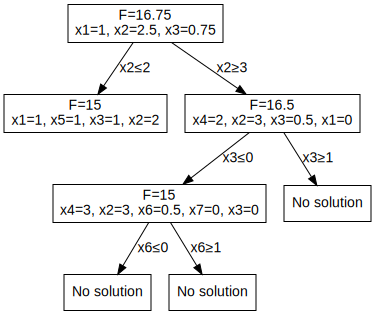

In [4]:
tree = BranchAndBound.resolve(source >> max)


display_markdown(
    "### Графическая визуализация решения при помощи метода ветвей и границ:",
    raw=True
)

tree.visualize(
    node_attr={"shape": "record", "fontname": "helvetica"},
    graph_attr={},
    edge_attr={"fontname": "helvetica"},
)

In [5]:
def expose_node(node):
    result = node.data

    display_markdown(
        f"#### Исходная таблица",
        Format(result.source).table(),
        f"#### Конечная таблица",
        Format(result.history[-1]).table(),
        f"{Format(result.history[-1]).base_vars()}, {Format(table).free_vars()}" if result.solved else "Нет решений",
        raw=True,
    )
    
    if node.left:
        display_markdown(
            f"### Ветвление влево по {node.left.label(pretty=True)}",
            raw=True,
        )

        expose_node(node.left.target)
    
    if node.right:
        display_markdown(
            f"### Ветвление вправо по {node.right.label(pretty=True)}",
            raw=True,
        )

        expose_node(node.right.target)
    
    if not node.left and not node.right:
        display_markdown(
            f"### Заканчиваем ветвление:",
            node.label(pretty=True),
            raw=True,
        )

expose_node(tree)

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_4$ |   $x_5$ |   $x_6$ |
|:------|--------:|--------:|--------:|--------:|
| $x_1$ |    1    |    0.5  |    0    |   -1    |
| $x_2$ |    2.5  |   -0.25 |    0.5  |    0.5  |
| $x_3$ |    0.75 |    0.12 |   -0.25 |    0.75 |
| $F$   |   16.75 |    0.12 |    1.75 |    2.75 |

$x_1 = 1, x_2 = 2.5, x_3 = 0.75$, $x_4 = x_5 = x_6 = 0$

### Ветвление влево по $x_2≤2$

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $x_7$ |       2 |       0 |     1   |       0 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_4$ |   $x_7$ |   $x_6$ |
|:------|--------:|--------:|--------:|--------:|
| $x_1$ |       1 |     0.5 |     0   |      -1 |
| $x_5$ |       1 |    -0.5 |    -2   |       1 |
| $x_3$ |       1 |    -0   |    -0.5 |       1 |
| $x_2$ |       2 |    -0   |     1   |       0 |
| $F$   |      15 |     1   |     3.5 |       1 |

$x_1 = 1, x_5 = 1, x_3 = 1, x_2 = 2$, $x_4 = x_5 = x_6 = 0$

### Заканчиваем ветвление:

$F=15, x_1=1, x_5=1, x_3=1, x_2=2$

### Ветвление вправо по $x_2≥3$

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $x_7$ |      -3 |      -0 |    -1   |      -0 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_7$ |   $x_5$ |   $x_6$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     2   |    -4   |      -2 |      -2 |
| $x_2$ |     3   |    -1   |       0 |       0 |
| $x_3$ |     0.5 |     0.5 |       0 |       1 |
| $x_1$ |     0   |     2   |       1 |      -0 |
| $F$   |    16.5 |     0.5 |       2 |       3 |

$x_4 = 2, x_2 = 3, x_3 = 0.5, x_1 = 0$, $x_4 = x_5 = x_6 = 0$

### Ветвление влево по $x_3≤0$

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $x_7$ |      -3 |      -0 |    -1   |      -0 |
| $x_8$ |       0 |       0 |     0   |       1 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_1$ |   $x_5$ |   $x_8$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     3   |    1.5  |   -0.5  |      -2 |
| $x_2$ |     3   |    0.5  |    0.5  |      -0 |
| $x_6$ |     0.5 |   -0.25 |   -0.25 |      -1 |
| $x_7$ |     0   |    0.5  |    0.5  |      -0 |
| $x_3$ |     0   |    0    |   -0    |       1 |
| $F$   |    15   |    0.5  |    2.5  |       3 |

$x_4 = 3, x_2 = 3, x_6 = 0.5, x_7 = 0, x_3 = 0$, $x_4 = x_5 = x_6 = 0$

### Ветвление влево по $x_6≤0$

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $x_7$ |      -3 |      -0 |    -1   |      -0 |
| $x_8$ |       0 |       0 |     0   |       1 |
| $x_9$ |       0 |       0 |     0   |       1 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_1$ |   $x_5$ |   $x_8$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     3   |    1.5  |   -0.5  |      -2 |
| $x_2$ |     3   |    0.5  |    0.5  |      -0 |
| $x_6$ |     0.5 |   -0.25 |   -0.25 |      -1 |
| $x_7$ |     0   |    0.5  |    0.5  |      -0 |
| $x_3$ |     0   |    0    |   -0    |       1 |
| $x_9$ |     0   |    0    |    0    |      -1 |
| $F$   |    15   |    0.5  |    2.5  |       3 |

$x_4 = 3, x_2 = 3, x_6 = 0.5, x_7 = 0, x_3 = 0, x_9 = 0$, $x_4 = x_5 = x_6 = 0$

### Заканчиваем ветвление:

No solution

### Ветвление вправо по $x_6≥1$

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $x_7$ |      -3 |      -0 |    -1   |      -0 |
| $x_8$ |       0 |       0 |     0   |       1 |
| $x_9$ |      -1 |      -0 |    -0   |      -1 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_1$ |   $x_5$ |   $x_8$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     3   |    1.5  |   -0.5  |      -2 |
| $x_2$ |     3   |    0.5  |    0.5  |      -0 |
| $x_6$ |     0.5 |   -0.25 |   -0.25 |      -1 |
| $x_7$ |     0   |    0.5  |    0.5  |      -0 |
| $x_3$ |     0   |    0    |   -0    |       1 |
| $x_9$ |    -1   |    0    |    0    |       1 |
| $F$   |    15   |    0.5  |    2.5  |       3 |

Нет решений

### Заканчиваем ветвление:

No solution

### Ветвление вправо по $x_3≥1$

#### Исходная таблица

|       |   $s_0$ |   $x_1$ |   $x_2$ |   $x_3$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |       6 |       2 |     1   |       2 |
| $x_5$ |       6 |       1 |     2   |       0 |
| $x_6$ |       2 |       0 |     0.5 |       1 |
| $x_7$ |      -3 |      -0 |    -1   |      -0 |
| $x_8$ |      -1 |      -0 |    -0   |      -1 |
| $F$   |      -0 |      -2 |    -5   |      -3 |

#### Конечная таблица

|       |   $s_0$ |   $x_7$ |   $x_5$ |   $x_6$ |
|:------|--------:|--------:|--------:|--------:|
| $x_4$ |     2   |    -4   |      -2 |      -2 |
| $x_2$ |     3   |    -1   |       0 |       0 |
| $x_3$ |     0.5 |     0.5 |       0 |       1 |
| $x_1$ |     0   |     2   |       1 |      -0 |
| $x_8$ |    -0.5 |     0.5 |       0 |       1 |
| $F$   |    16.5 |     0.5 |       2 |       3 |

Нет решений

### Заканчиваем ветвление:

No solution

In [6]:
solutions = [node.data.result for node in tree.leaves if not node.invalid]

display_markdown(
    "### Целочисленные решения:",
    *[
        ', '.join([
            f"$F={pretty_value(table.result, 2)}$",
            Format(table).solution(),
        ])
        for table in solutions
    ],
    raw=True, 
)

### Целочисленные решения:

$F=15$, $x_1 = 1, x_2 = 2, x_3 = 1$